# Machine Learning Engineer Nanodegree Program 

### Capstone Project : Object Detection, Classification and Recognition of Corvette Generations

#### By: Joel Haas
#### October 2019



## Import Python Libraries ##

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

%matplotlib inline

from keras.preprocessing import image
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.utils import to_categorical
from keras.layers.normalization import BatchNormalization
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder
from sklearn import preprocessing
from keras.models import load_model

from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


## Import Training Data

In [2]:
# path to the project folder
path = r"labels"

# ingest subset of training data
#train = pd.read_csv(path + '/labels_training_data.csv')

# ingest full set of training data
train = pd.read_csv(path + '/labels_training_10000.csv')

In [3]:
# view training data
train.head()

,id,car,corvette,c1,c2,c3,c4,c5,c6,c7,c8,classification
0,cars_1_0_0_ (7042).jpg,1,0,0,0,0,0,0,0,0,0,"['car', 'not_corvette']"
1,cars_1_0_0_ (7043).jpg,1,0,0,0,0,0,0,0,0,0,"['car', 'not_corvette']"
2,cars_1_0_0_ (7044).jpg,1,0,0,0,0,0,0,0,0,0,"['car', 'not_corvette']"
3,cars_1_0_0_ (7045).jpg,1,0,0,0,0,0,0,0,0,0,"['car', 'not_corvette']"
4,cars_1_0_0_ (7046).jpg,1,0,0,0,0,0,0,0,0,0,"['car', 'not_corvette']"


In [4]:
# shape of the training data
train.shape

(9056, 12)

## One Hot Encode the Target Labels

By one hot encoding the target labels, we can predict the unique combination we are trying to predict, e.g. "car, corvette, c1" or "car, not corvette".

In [5]:
# One hot encode the classification column. Unique classifications become their own unique column with
#   1's and 0's 
labels = pd.get_dummies(train['classification'])
labels.head()

,"['car', 'corvette', 'c1']","['car', 'corvette', 'c2']","['car', 'corvette', 'c3']","['car', 'corvette', 'c4']","['car', 'corvette', 'c5']","['car', 'corvette', 'c6']","['car', 'corvette', 'c7']","['car', 'corvette', 'c8']","['car', 'not_corvette']","['not_car', 'not_corvette']"
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0


In [6]:
# combine the one hot encoded classifications with the image id's to create
#   a new dataset of image IDs with the one hot encoded classifications
train = pd.concat([train['id'], labels], axis=1)

In [7]:
#view shape of the dataframe
train.shape

(9056, 11)

In [8]:
# Training data set is now image id's plus the one hot encoded classifications
#    We will use the IDs to ingest the images. The classifications will become
#    the targets we will predict.
train[50:100]

,id,"['car', 'corvette', 'c1']","['car', 'corvette', 'c2']","['car', 'corvette', 'c3']","['car', 'corvette', 'c4']","['car', 'corvette', 'c5']","['car', 'corvette', 'c6']","['car', 'corvette', 'c7']","['car', 'corvette', 'c8']","['car', 'not_corvette']","['not_car', 'not_corvette']"
50,cars_1_0_0_ (7092).jpg,0,0,0,0,0,0,0,0,1,0
51,cars_1_0_0_ (7093).jpg,0,0,0,0,0,0,0,0,1,0
52,cars_1_0_0_ (7094).jpg,0,0,0,0,0,0,0,0,1,0
53,cars_1_0_0_ (7095).jpg,0,0,0,0,0,0,0,0,1,0
54,cars_1_0_0_ (7096).jpg,0,0,0,0,0,0,0,0,1,0
55,cars_1_0_0_ (7097).jpg,0,0,0,0,0,0,0,0,1,0
56,cars_1_0_0_ (7098).jpg,0,0,0,0,0,0,0,0,1,0
57,cars_1_0_0_ (7099).jpg,0,0,0,0,0,0,0,0,1,0
58,cars_1_0_0_ (7100).jpg,0,0,0,0,0,0,0,0,1,0
59,cars_1_0_0_ (7101).jpg,0,0,0,0,0,0,0,0,1,0


## Load and Pre-Process the Images 

We need to read in each image and pre-process it for our neural network.  The output is an array where each image is the same size and with pixel values between 0 and 1.   

In [9]:
### Function to Load and Pre-Process the Images ###
def preprocess(data, sub_dir):
    """Input: dataframe with image IDs and the one hot encoded classifications
       Output: a numpy array with all the images pre-processed"""
       
    train_image = []
    for i in tqdm(range(data.shape[0])):
        try:
            # load each image and resize
            img = image.load_img(sub_dir + data['id'][i], target_size=(400,400,3))
            
            # convert image to an array
            img = image.img_to_array(img)
            
            # divide image by 255 so values are between 0 and 1 
            img = img/255
            
            # add the processed image to a list
            train_image.append(img)
        except:
            print(i)
    
    # convert the list of preprocessed images to a numpy array
    X = np.array(train_image)
    
    return X


In [10]:
# directory with the subset of images for training
#sub_dir_train = r'images/dataSet_training//'

# directory with the full set of images for training
sub_dir_train = r'images/dataSet_10000//'

# Input to function: dataframe with image IDs and the location of the folder
# Output is a numpy array with all the images pre-processed
X = preprocess(train, sub_dir_train)

 75%|███████▍  | 6779/9056 [03:42<03:44, 10.15it/s]/usr/local/lib/python3.5/dist-packages/PIL/Image.py:872: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
100%|██████████| 9056/9056 [05:09<00:00, 29.23it/s]


In [11]:
# view shape of the preprocessed images we will use for training
X.shape

(9056, 400, 400, 3)

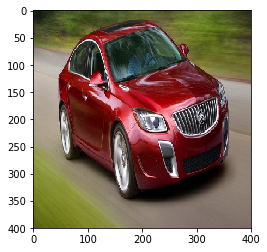

In [12]:
# view one of the images
plt.imshow(X[74])

## Prepare the Target for our Predictive Model

Our target is the one hot encoded classifications

In [13]:
# drop the ID column so that only the one hot encoded classifications remain
y = np.array(train.drop(['id'], axis=1))
y.shape

(9056, 10)

In [14]:
y

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

## Pre-Process Hold-out Test Set 

Now we have our model built on our test and validation sets. We need to pre-process our test set of images just like we did our training set. 

In [15]:
## Test Data Set
test_data = pd.read_csv("labels/labels_test_data.csv")
test_data.head()

,id,car,corvette,c1,c2,c3,c4,c5,c6,c7,c8,classification
0,cars_1_0_0_ (44).jpg,1,0,0,0,0,0,0,0,0,0,"['car', 'not_corvette']"
1,cars_1_0_0_ (45).jpg,1,0,0,0,0,0,0,0,0,0,"['car', 'not_corvette']"
2,cars_1_0_0_ (46).jpg,1,0,0,0,0,0,0,0,0,0,"['car', 'not_corvette']"
3,cars_1_0_0_ (47).jpg,1,0,0,0,0,0,0,0,0,0,"['car', 'not_corvette']"
4,cars_1_0_0_ (48).jpg,1,0,0,0,0,0,0,0,0,0,"['car', 'not_corvette']"


In [16]:
test_data.shape

(486, 12)

In [17]:
# one hot encode the classification labels
true_labels_test = pd.get_dummies(test_data['classification'])
true_labels_test.head()

,"['car', 'corvette', 'c1']","['car', 'corvette', 'c2']","['car', 'corvette', 'c3']","['car', 'corvette', 'c4']","['car', 'corvette', 'c5']","['car', 'corvette', 'c6']","['car', 'corvette', 'c7']","['car', 'corvette', 'c8']","['car', 'not_corvette']","['not_car', 'not_corvette']"
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0


In [18]:
# combine the image IDs with the one hot encoded target labels
test_set = pd.concat([test_data['id'], true_labels_test], axis=1)
test_set.head()

,id,"['car', 'corvette', 'c1']","['car', 'corvette', 'c2']","['car', 'corvette', 'c3']","['car', 'corvette', 'c4']","['car', 'corvette', 'c5']","['car', 'corvette', 'c6']","['car', 'corvette', 'c7']","['car', 'corvette', 'c8']","['car', 'not_corvette']","['not_car', 'not_corvette']"
0,cars_1_0_0_ (44).jpg,0,0,0,0,0,0,0,0,1,0
1,cars_1_0_0_ (45).jpg,0,0,0,0,0,0,0,0,1,0
2,cars_1_0_0_ (46).jpg,0,0,0,0,0,0,0,0,1,0
3,cars_1_0_0_ (47).jpg,0,0,0,0,0,0,0,0,1,0
4,cars_1_0_0_ (48).jpg,0,0,0,0,0,0,0,0,1,0


In [19]:
test_set.shape

(486, 11)

In [20]:
### Load and preprocess test data

# directory path for our test set
sub_dir_test = r'images/testSet//'

# preprocess the test set and return an array
X_test = preprocess(test_data, sub_dir_test)
X_test

100%|██████████| 486/486 [00:16<00:00, 29.85it/s]


array([[[[ 0.97647059,  1.        ,  0.99215686],
         [ 0.97647059,  1.        ,  0.99215686],
         [ 0.97647059,  1.        ,  0.99215686],
         ..., 
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ]],

        [[ 0.97647059,  1.        ,  0.99215686],
         [ 0.97647059,  1.        ,  0.99215686],
         [ 0.97647059,  1.        ,  0.99215686],
         ..., 
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ]],

        [[ 0.97647059,  1.        ,  0.99215686],
         [ 0.97647059,  1.        ,  0.99215686],
         [ 0.97647059,  1.        ,  0.99215686],
         ..., 
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ]],

        ..., 
        [[ 0.50588238,  0.56470591,

In [21]:
# view shape of the test set
X_test.shape

(486, 400, 400, 3)

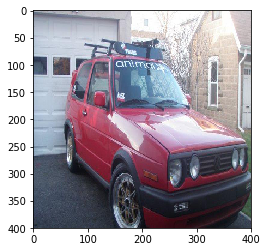

In [22]:
# view one of the images in the test set after pre-processing
plt.imshow(X_test[1])

In [23]:
# Prepare target labels for the test set
y_true_labels = np.array(test_set.drop(['id'], axis=1))
y_true_labels.shape

(486, 10)

In [24]:
y_true_labels

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

## Transfer Learning

... Transfer Learning is used to leverage existing and complex architectures that have been shown to have great performance.  I leverage the weights of the pre-trained models and then add several of layers of my own that are specific to this project.  The last layer again will contain one node for each possible classification.

We will use two pre-trained models for comparison, VGG16 and ResNet50.  We start with VGG16. 

In [25]:
from keras.models import Model
from keras import applications
from keras.layers import Input

In [26]:
# specify the size of the input tensor based on the image reshape size
#  we did previously
input_tensor = Input(shape=(400,400,3))

## ResNet50 Re-Trained

Now, let's try using the ResNet50 architecture, but re-training the weights across the entire model

In [29]:
# load Resnet50 neural network and exclude the output layers
base_model_Resnet_retrained = applications.ResNet50(weights='imagenet', 
                                 include_top=False,
                                input_tensor=input_tensor)

xR = base_model_Resnet_retrained.output

# Add additional layers to the Resnet50 CNN architecture
xR = GlobalAveragePooling2D()(xR)
predsR = Dense(10, activation='sigmoid')(xR)

model_Resnet50_retrained = Model(inputs=base_model_Resnet_retrained.input, outputs=predsR)

# Compile the model with the selected parameters
model_Resnet50_retrained.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# set the number of epochs to run
epochs = 2

# Create a validation set to check performance of our model on unseen data
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=32, test_size=0.10)

# Fit the model to the training set and test with the validation set
model_Resnet50_retrained.fit(X_train, y_train, epochs=epochs, 
          validation_data=(X_val, y_val), 
          batch_size=20, verbose=1)

Train on 8150 samples, validate on 906 samples
Epoch 1/2
8150/8150 [==============================] - 7703s - loss: 0.3336 - acc: 0.9020 - val_loss: 0.3438 - val_acc: 0.9000
Epoch 2/2
8150/8150 [==============================] - 6216s - loss: 0.2486 - acc: 0.9125 - val_loss: 0.2985 - val_acc: 0.9053


In [30]:
# save model as an HDF5 file
model_Resnet50_retrained.save('Resnet50_model_retrained.h5')

# load the compiled model
model_Resnet50_retrained = load_model('Resnet50_model_retrained.h5')

# iterate through the test set and make a prediction
corvette_predictions = [np.argmax(model_Resnet50_retrained.predict(np.expand_dims(image, axis=0))) for image in X_test]

# compare the predictions to the true classification and calculate 
#   the total accuracy
test_accuracy = (100 * np.sum(np.array(corvette_predictions)==np.argmax(y_true_labels, axis=1))) / len(corvette_predictions)
test_accuracy

30.246913580246915